In [1]:
import numpy as np
import glob
import sys
import os
import re
import gzip
#from matplotlib.projections import register_projection
from windrose import WindroseAxes
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.text import Text, FontProperties
import matplotlib.cm as cm
from os.path import expanduser

In [75]:
#These are the two Mesowest Files for Montclair CA and Melbourne FL 
path = '/Users/slazarus_admin/OneDrive - Florida Institute of Technology/MET3601/DRL_notebooks/'
data1=pd.read_csv(path + 'KMLB_2024.csv')
data1
nrows=data1.shape[0]
ncols=data1.shape[1]
print (nrows,ncols)
print(data1.dtypes)

#Pull out wind speed and direction (wd and ws)
ws=data1.iloc[0:nrows,3:4].values
print(ws)

data1['sknt'] = data1['sknt'].astype(str).str.strip("[]'")  # clean up brackets/quotes
data1['sknt'] = pd.to_numeric(data1['sknt'], errors='coerce')
data1
print(data1.dtypes)


wd=data1.iloc[0:nrows,2:3].values
print(wd)

data1['drct'] = data1['drct'].astype(str).str.strip("[]'")  # clean up brackets/quotes
data1['drct'] = pd.to_numeric(data1['drct'], errors='coerce')
data1
print(data1.dtypes)

# Flatten arrays (to 1D) for WindRose
wsf = np.array(ws).flatten()
wdf = np.array(wd).flatten()

# Convert wind speed to numeric, coerce errors to NaN
wsf = pd.to_numeric(wsf, errors='coerce')
wdf = pd.to_numeric(wdf, errors='coerce')

# Drop NaN values (or handle them as calm winds if needed)
mask = ~np.isnan(wsf)
wdf = wdf[mask]
wsf = wsf[mask]

print (type(wsf), wsf.shape)
print (type(wdf), wdf.shape)

# If there are a bunch of zero wind speeds/directions you can remove them...
wsf[wsf==0]  = -9999.

print(wsf.min())

# wsfnz = wsf[(wsf > 0)] 
# wdfnz = wdf[(wsf > 0)]
# print (len(wsfnz),len(wdfnz))

10830 5
station    object
valid      object
drct       object
sknt       object
gust       object
dtype: object
[['0.00']
 ['0.00']
 ['0.00']
 ...
 ['7.00']
 ['5.00']
 ['5.00']]
station     object
valid       object
drct        object
sknt       float64
gust        object
dtype: object
[['0.00']
 ['0.00']
 ['0.00']
 ...
 ['270.00']
 ['230.00']
 ['230.00']]
station     object
valid       object
drct       float64
sknt       float64
gust        object
dtype: object
<class 'numpy.ndarray'> (10780,)
<class 'numpy.ndarray'> (10780,)
-9999.0


In [76]:
print(data1.sknt,data1.drct)

0         0.0
1         0.0
2         0.0
3         0.0
4         5.0
         ... 
10825    10.0
10826    10.0
10827     7.0
10828     5.0
10829     5.0
Name: sknt, Length: 10830, dtype: float64 0          0.0
1          0.0
2          0.0
3          0.0
4        220.0
         ...  
10825    300.0
10826    290.0
10827    270.0
10828    230.0
10829    230.0
Name: drct, Length: 10830, dtype: float64


9891 9891
[5. 5. 3. ... 7. 5. 5.]
[220. 280. 200. ... 270. 230. 230.]
3.0 38.0 8.73197856637347


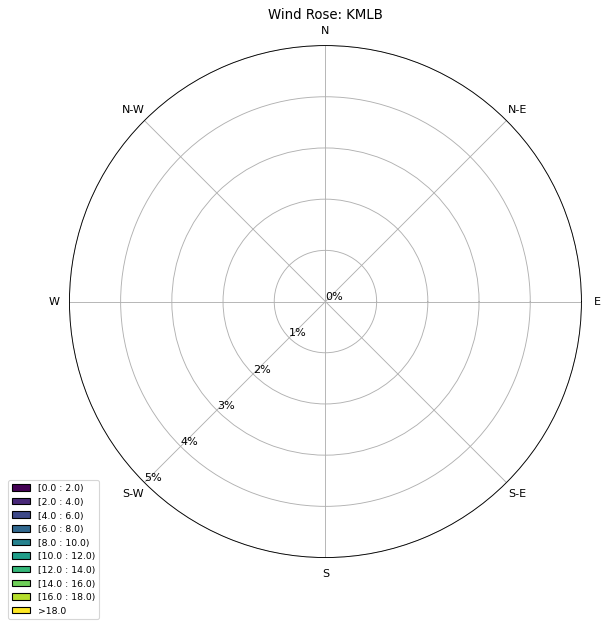

In [81]:
# wdf is the wind direction array, wsf is the wind speed array
stn   = "KMLB"
title = "Wind Rose: " + stn

#wsf = np.clip(wsf, 0, None)  # None means no upper bound
mask = wsf > 0        # Boolean mask for positive wind speeds
wsf = wsf[mask]       # Filter wind speeds
wdf = wdf[mask]       # Filter directions using the same mask

print(len(wsf),len(wdf))
print(wsf)
print(wdf)

#print("The following are your minimum windspeed, max windspeed, and average wind speed:")
print(np.min(wsf),np.max(wsf),np.average(wsf))

ax = WindroseAxes.from_ax()
ax.bar(wdf, wsf, normed=True, opening=0.0, edgecolor='white',nsector=36,
       calm_limit = None, bins=np.arange(0.0,20.0, 2))

ax.set_rmax(5)
ax.set_rlabel_position(225)  # Position radial labels
ax.set_yticks([0, 1, 2, 3, 4, 5])  # Example percentage ticks
ax.set_yticklabels(['0%', '1%', '2%', '3%', '4%', '5%'])

#ax.legend(loc='upper left',prop=FontProperties(size='smaller'))
ax.legend(loc=(-.12,-.12),prop=FontProperties(size='smaller'))
plt.title(title)
#plt.figtext(.5, .02, home)
plt.show()

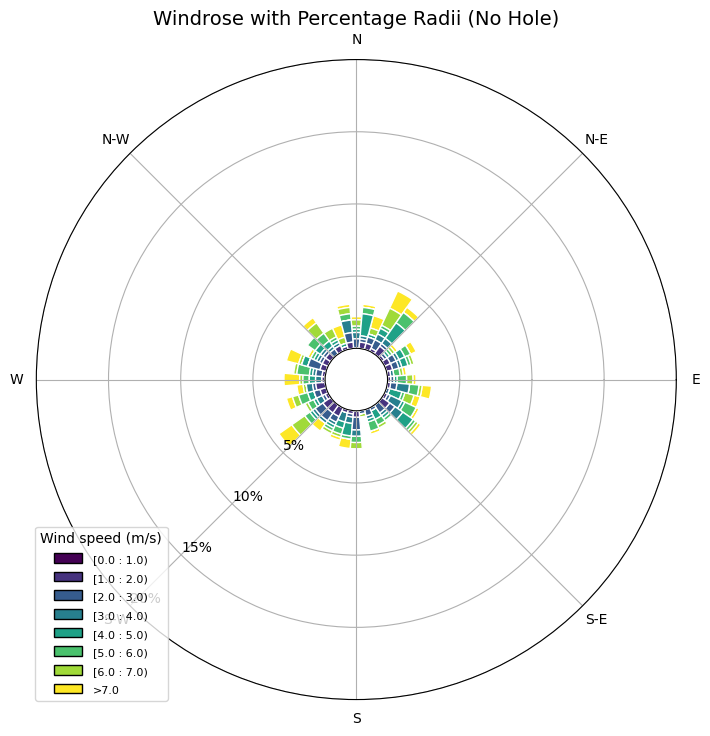

In [71]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes

# -----------------------------
# 1. Generate sample wind data
# -----------------------------
np.random.seed(42)
wdf = np.random.uniform(0, 360, 500)  # Wind directions
wsf = np.random.choice([0, 1, 2, 3, 4, 5, 6, 7, 'NA'], size=500)  # Wind speeds with some invalid entries

# -----------------------------
# 2. Clean wind speed data
# -----------------------------
wsf = pd.to_numeric(wsf, errors='coerce')  # Convert to numeric, invalid -> NaN
mask = ~np.isnan(wsf)                      # Remove NaN
wdf = wdf[mask]
wsf = wsf[mask]

# Clip negative values (if any)
if isinstance(wsf, np.ndarray):
    wsf = np.clip(wsf, 0, None)
else:
    wsf = wsf.clip(lower=0)

# -----------------------------
# 3. Create Windrose plot
# -----------------------------
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)

ax.bar(wdf, wsf,
       normed=True,                # Radii represent percentages
       opening=1.0,                # No hole in the center
       edgecolor='white',
       nsector=36,                 # 10° sectors
       bins=np.arange(0, 8, 1),    # Speed bins: 0–7 m/s
       calm_limit=0)               # Treat speeds < 0 as calm

# -----------------------------
# 4. Customize plot
# -----------------------------
ax.set_legend(title="Wind speed (m/s)")
ax.set_title("Windrose with Percentage Radii (No Hole)", fontsize=14)
ax.set_rlabel_position(225)  # Position radial labels
ax.set_yticks([5, 10, 15, 20])  # Example percentage ticks
ax.set_yticklabels(['5%', '10%', '15%', '20%'])

plt.show()
